# Binary Classification using Perceptron

### Lab Assignment 1 - Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model.

## Perform the following functions
1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low should be in red color. Give appropriate legends. 
2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3. Plot a bar chart of number of 1's and 0's in the training dataset. 
4. Use the perceptron model to classify the data, and get predictions for test dataset.
5. Obtain the confusion matrix of the output.
6. Plot the separating hyperplane on the training dataset.
7. Get the classification result for the values of weight 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively. 

## Split the dataset with 80:20 ratio, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?

## Perform KFold cross validation for k=3 to 6 for this dataset.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df.head()

,weight,horsepower,mileage
0,1.40,43,1
1,1.50,8,0
2,2.71,44,1
3,3.55,23,0
4,2.50,15,0


# Answer 1

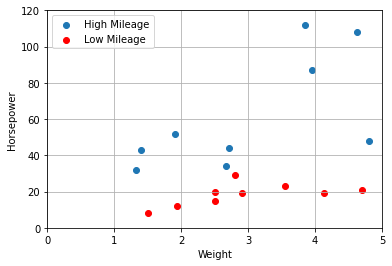

In [21]:
high_mileage = df[df['mileage'] == 1]
low_mileage = df[df['mileage'] == 0]
# print(low_mileage)
plt.scatter(high_mileage['weight'], high_mileage['horsepower'], label='High Mileage')
plt.scatter(low_mileage['weight'], low_mileage['horsepower'], color='r', label='Low Mileage')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.axis([0,5,0,120])
plt.legend()
plt.grid()

# Answer 2

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['weight', 'horsepower']], df['mileage'],test_size=0.2, random_state=3)

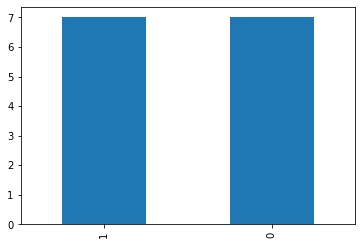

In [8]:
y_train.value_counts().plot(kind='bar')

# Answer 3

In [27]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(max_iter=100)
model = classifier.fit(x_train, y_train)

In [28]:
predictions = model.predict(x_test)
print("Obtained prediction", predictions)
print("Actual prediction", y_test.tolist())

Obtained prediction [0 0 0 1]
Actual prediction [0, 1, 0, 1]


# Answer 4

In [29]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predictions)

array([[2, 0],
       [1, 1]], dtype=int64)

# Answer 5

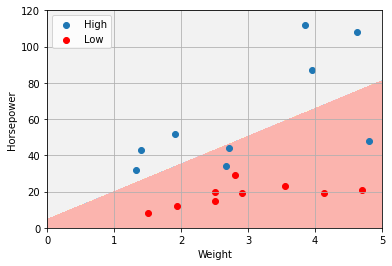

In [30]:
import numpy as np 
x_min, x_max = 0, 5
y_min, y_max = 0, 120

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(high_mileage['weight'], high_mileage['horsepower'], label='High')
plt.scatter(low_mileage['weight'], low_mileage['horsepower'], color='r', label='Low')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.axis([0,5,0,120])
plt.legend()
plt.grid()

# Answer 6

In [11]:
input_values = [[2, 20], [3.3, 29], [1.21, 13], [5.32, 100], [1.23, 40], [4.8, 49]]
model.predict(input_values)

array([0, 0, 0, 1, 1, 1], dtype=int64)

# Extra

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Perceptron(max_iter=100), df[['weight', 'horsepower']], df['mileage'], cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.75 1.   1.   0.5  1.   0.5 ]
